Fashion-MNIST — Clothing Classification (Small vs Large CNN)

This notebook trains two CNN models (small and large) on the Fashion-MNIST dataset.
We compare the results and generate a confusion matrix for evaluation.
Screenshots of training logs and plots are saved for the repository.

Source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist

In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append("..")

from src.data import set_global_seed, load_fashion_mnist
from src.models import build_cnn_small, build_cnn_large
from src.train import train_model, evaluate_model, get_true_labels
from src.plots import plot_training_history, plot_confusion_matrix

os.makedirs("../screenshots", exist_ok=True)

set_global_seed(42)
print("Setup ready.")

Setup ready.


c:\Users\gabry\OneDrive\Pulpit\Szkoła\NAI\PROJECTS\Simple_AI_Games\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
X_train, X_test, y_train, y_test, class_names = load_fashion_mnist(
    normalize=True,
    expand_channel=True
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Classes:", class_names)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1) (60000, 10)
Test shape: (10000, 28, 28, 1) (10000, 10)
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

cnn_small = build_cnn_small(input_shape=input_shape, num_classes=num_classes)

history_small = train_model(
    cnn_small,
    X_train, y_train,
    X_val=X_test, y_val=y_test,
    epochs=8,
    batch_size=64,
    verbose=1
)


Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8317 - loss: 0.4689 - val_accuracy: 0.8871 - val_loss: 0.3132
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8945 - loss: 0.2912 - val_accuracy: 0.9051 - val_loss: 0.2574
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9113 - loss: 0.2419 - val_accuracy: 0.9131 - val_loss: 0.2368
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9223 - loss: 0.2112 - val_accuracy: 0.9176 - val_loss: 0.2332
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9321 - loss: 0.1847 - val_accuracy: 0.9210 - val_loss: 0.2265
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9404 - loss: 0.1607 - val_accuracy: 0.9205 - val_loss: 0.2292
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9456 - loss: 0.1458 - val_accuracy: 0.9182 - val_loss: 0.2440
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9516 - loss: 0.1304 - val_accuracy: 0.9161 - v

Fashion-MNIST — CNN Small Accuracy: 0.916100025177002


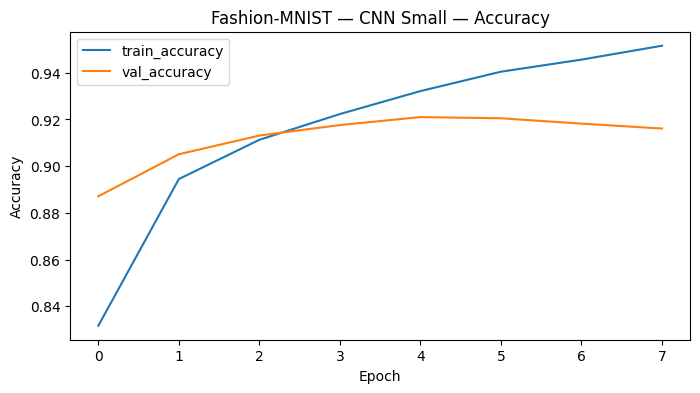

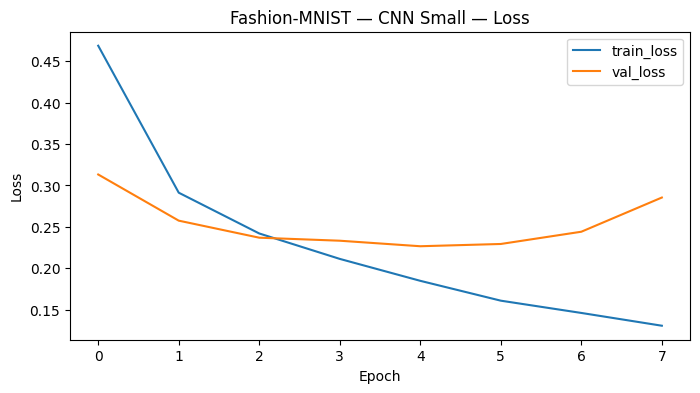

In [4]:
acc_small, y_pred_small = evaluate_model(cnn_small, X_test, y_test)
print("Fashion-MNIST — CNN Small Accuracy:", acc_small)

plot_training_history(
    history_small,
    title="Fashion-MNIST — CNN Small",
    save_path="../screenshots/fashion_cnn_small_history.png"
)


In [5]:
cnn_large = build_cnn_large(input_shape=input_shape, num_classes=num_classes)

history_large = train_model(
    cnn_large,
    X_train, y_train,
    X_val=X_test, y_val=y_test,
    epochs=8,
    batch_size=64,
    verbose=1
)


Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8183 - loss: 0.4962 - val_accuracy: 0.8795 - val_loss: 0.3283
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8928 - loss: 0.2919 - val_accuracy: 0.9031 - val_loss: 0.2566
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9106 - loss: 0.2431 - val_accuracy: 0.9129 - val_loss: 0.2480
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9218 - loss: 0.2116 - val_accuracy: 0.9174 - val_loss: 0.2378
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9323 - loss: 0.1867 - val_accuracy: 0.9199 - val_loss: 0.2386
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9382 - loss: 0.1655 - val_accuracy: 0.9212 - val_loss: 0.2325
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9449 - loss: 0.1475 - val_accuracy: 0.9214 - val_loss: 0.2496
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9506 - loss: 0.1301 - val_accuracy: 0.9

Fashion-MNIST — CNN Large Accuracy: 0.9276999831199646


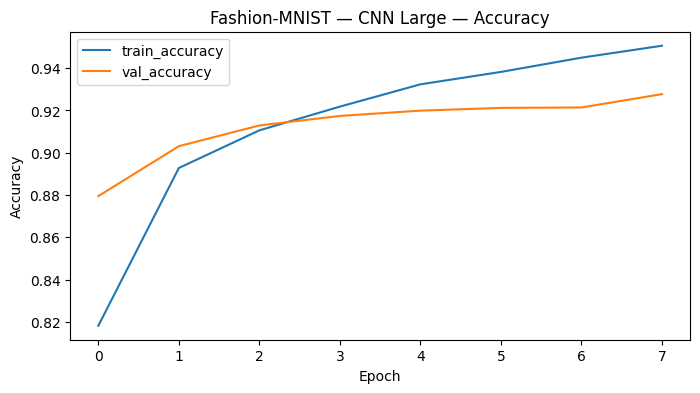

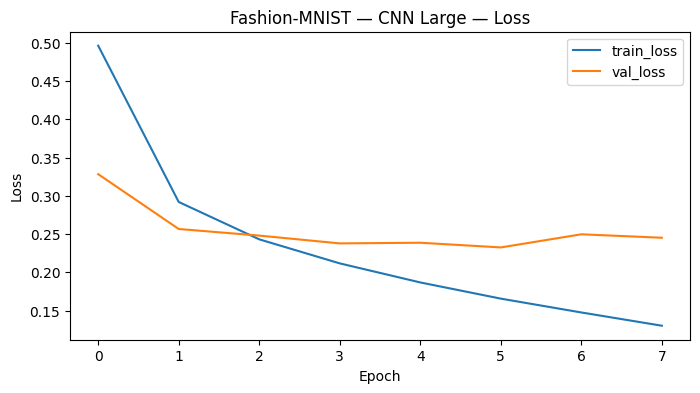

In [6]:
acc_large, y_pred_large = evaluate_model(cnn_large, X_test, y_test)
print("Fashion-MNIST — CNN Large Accuracy:", acc_large)

plot_training_history(
    history_large,
    title="Fashion-MNIST — CNN Large",
    save_path="../screenshots/fashion_cnn_large_history.png"
)


In [7]:
results = pd.DataFrame([
    {"model": "CNN Small", "accuracy": acc_small},
    {"model": "CNN Large", "accuracy": acc_large},
]).sort_values("accuracy", ascending=False)

results


,model,accuracy
1,CNN Large,0.9277
0,CNN Small,0.9161


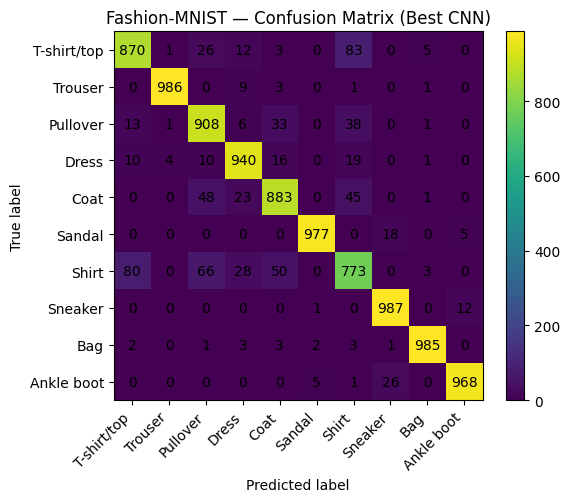

array([[870,   1,  26,  12,   3,   0,  83,   0,   5,   0],
       [  0, 986,   0,   9,   3,   0,   1,   0,   1,   0],
       [ 13,   1, 908,   6,  33,   0,  38,   0,   1,   0],
       [ 10,   4,  10, 940,  16,   0,  19,   0,   1,   0],
       [  0,   0,  48,  23, 883,   0,  45,   0,   1,   0],
       [  0,   0,   0,   0,   0, 977,   0,  18,   0,   5],
       [ 80,   0,  66,  28,  50,   0, 773,   0,   3,   0],
       [  0,   0,   0,   0,   0,   1,   0, 987,   0,  12],
       [  2,   0,   1,   3,   3,   2,   3,   1, 985,   0],
       [  0,   0,   0,   0,   0,   5,   1,  26,   0, 968]])

In [8]:
y_true = get_true_labels(y_test)

plot_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred_large,  # use the better model (or pick small)
    class_names=class_names,
    title="Fashion-MNIST — Confusion Matrix (Best CNN)",
    save_path="../screenshots/fashion_confusion_matrix.png"
)


Both CNN models achieve strong performance on Fashion-MNIST.
The larger network usually performs slightly better, but it can also train slower.
The confusion matrix shows which clothing classes are most often confused, giving a clear view of model strengths and weaknesses.